# Regularización de una Red Neuronal

1. `Dropout:` funciona como una capa que “apaga” neuronas de la capa anterior al azar.
2. `Regularizaciones L1 y L2:` agregan un término a la función de costo que castiga los pesos grandes.

## 1. Dropout

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.datasets.samples_generator import make_blobs, make_moons

X, y = make_moons(n_samples=1000, random_state=0)

Using TensorFlow backend.
/home/anybody/Projects/Acamica/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

In [3]:
model_dropout = Sequential()
model_dropout.add(Dense(30, activation='relu'))
model_dropout.add(Dropout(0.5)) #Capa de Dropout con un porcentaje de neuronas apagadas del 50%
model_dropout.add(Dense(1, activation='sigmoid'))

In [4]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, decay=0.0, amsgrad=False)
model_dropout.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
history_dropout = model_dropout.fit(X, y, epochs=100, validation_split=0.25, verbose=0)
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                90        
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


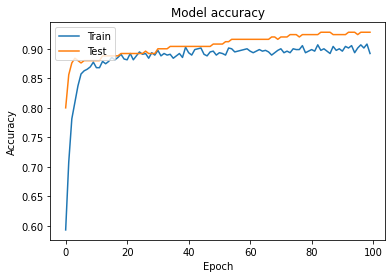

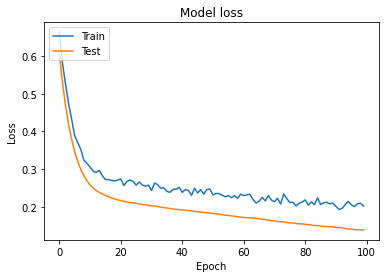

In [6]:
# Plot training & validation accuracy values
plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

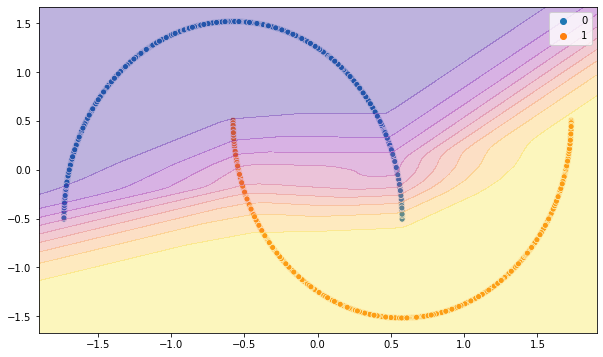

In [7]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model_dropout.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

---
## 2. Regularizaciones L1 y L2

In [8]:
X, y = make_moons(n_samples=1000, random_state=0)
X[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

Regularizaciones en la clase __Dense__ (neurona):

* `kernel_regularizer:` Regularización aplicada a la matriz de pesos.
* `bias_regularizer:` Regularización aplicada al vector de bias.
* `activity_regularizer:` Regularización aplicada a la salida de la capa de activación.

Posibles penalidades que podemos aplicar a la clase __Dense__:

* `keras.regularizers.l1(0.)`
* `keras.regularizers.l2(0.)`
* `keras.regularizers.l1_l2(l1=0.01, l2=0.01)`

In [9]:
from keras import regularizers

model_L1_L2 = Sequential()
model_L1_L2.add(Dense(30, kernel_regularizer=regularizers.l2(0.01),
                    bias_regularizer=regularizers.l2(0.01),
                    activation='relu'))
model_L1_L2.add(Dense(1, activation='sigmoid'))

In [10]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, decay=0.0, amsgrad=False)
model_L1_L2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history_L1_L2 = model_L1_L2.fit(X, y, epochs=100, validation_split=0.25, verbose=0)
model_L1_L2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


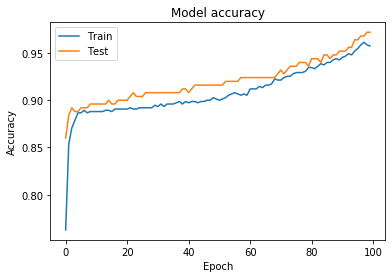

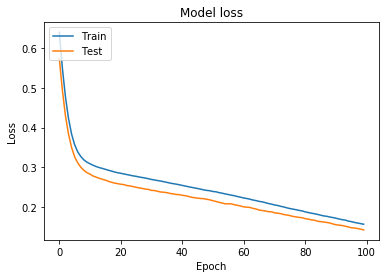

In [12]:
# Plot training & validation accuracy values
plt.plot(history_L1_L2.history['accuracy'])
plt.plot(history_L1_L2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_L1_L2.history['loss'])
plt.plot(history_L1_L2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

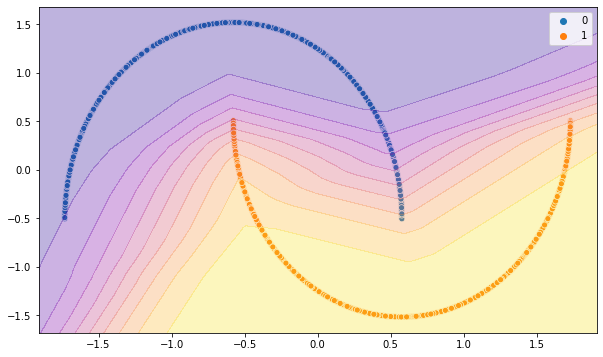

In [13]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model_L1_L2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()